# IMPORTING RELEVANT LIBRARIES

In [1136]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

# EXPLORATORY ANALYSIS OF THE DATA AND FEATURE EXTRACTION

In [1137]:
df = pd.read_csv('list.csv')
df

,id,timestamp,open,high,low,close,trade_count,volume,interval_in_minutes,instrument_id
0,205035,2021-06-04 19:06:51.671951+00:00,2703.32,2703.32,2701.03,2702.16,15.0,23.19,1.0,2.0
1,205036,2021-06-04 19:06:54.387577+00:00,37144.10,37153.70,37143.00,37150.00,13.0,1.27,1.0,1.0
2,205037,2021-06-04 19:06:55.795800+00:00,2703.32,2703.32,2701.03,2702.17,17.0,29.19,1.0,2.0
3,205038,2021-06-04 19:06:56.993907+00:00,2703.32,2703.32,2701.03,2702.88,20.0,33.08,1.0,2.0
4,205039,2021-06-04 19:06:58.472575+00:00,2703.32,2703.32,2701.03,2702.79,21.0,33.09,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
97771,302806,2021-06-07 17:09:06.613015+00:00,2736.00,2737.13,2734.15,2734.15,98.0,701.75,1.0,2.0
97772,302807,2021-06-07 17:09:06.632940+00:00,2736.00,2737.13,2734.15,2735.00,99.0,738.24,1.0,2.0
97773,302808,2021-06-07 17:09:06.647559+00:00,2736.00,2737.13,2734.15,2734.90,109.0,740.74,1.0,2.0
97774,302809,2021-06-07 17:09:06.660981+00:00,2736.00,2737.13,2734.15,2734.90,110.0,741.74,1.0,2.0


In [1138]:
# Pandas dt.date, dt.strftime('%H:%S'), dt.dayofweek attributes returns date, time(in hours and seconds) 
#and the day of the week respectively and it is assumed the week starts on Monday, which is denoted by
#0 and ends on Sunday which is denoted by 6. To replace the number with full name, we can create a mapping 
#and pass it to map(): This was necessary to help answer questions from this datset set pertaining to days of 
#the week. 

In [1139]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.strftime('%H:%S')
dw_mapping={ 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',  3: 'Thursday',  4: 'Friday', 5: 'Saturday',  6: 'Sunday'} 
df['weekday']= pd.to_datetime(df['timestamp']).dt.weekday.map(dw_mapping)
df.head()

,id,timestamp,open,high,low,close,trade_count,volume,interval_in_minutes,instrument_id,date,time,weekday
0,205035,2021-06-04 19:06:51.671951+00:00,2703.32,2703.32,2701.03,2702.16,15.0,23.19,1.0,2.0,2021-06-04,19:51,Friday
1,205036,2021-06-04 19:06:54.387577+00:00,37144.10,37153.70,37143.00,37150.00,13.0,1.27,1.0,1.0,2021-06-04,19:54,Friday
2,205037,2021-06-04 19:06:55.795800+00:00,2703.32,2703.32,2701.03,2702.17,17.0,29.19,1.0,2.0,2021-06-04,19:55,Friday
3,205038,2021-06-04 19:06:56.993907+00:00,2703.32,2703.32,2701.03,2702.88,20.0,33.08,1.0,2.0,2021-06-04,19:56,Friday
4,205039,2021-06-04 19:06:58.472575+00:00,2703.32,2703.32,2701.03,2702.79,21.0,33.09,1.0,2.0,2021-06-04,19:58,Friday


# FEATURE SELECTION

In [1140]:
#selecting the features that are relevant to this project and dropping those that are not.

In [1141]:
df = df.drop(['timestamp','id','trade_count','interval_in_minutes' ],axis=1)

df =df.dropna(axis=0)

In [1142]:
# BTC(1.0) is the instrument_id of interest so other instrument_ids that are not BTC will be dropped.

In [1143]:
indexNames = df[ (df['instrument_id'] !=1.0)].index
df.drop(indexNames , inplace=True)
df

,open,high,low,close,volume,instrument_id,date,time,weekday
1,37144.1,37153.7,37143.0,37150.0,1.27,1.0,2021-06-04,19:54,Friday
6,37144.1,37153.7,37143.0,37149.9,1.54,1.0,2021-06-04,19:59,Friday
8,37145.5,37145.5,37145.5,37145.5,0.00,1.0,2021-06-04,19:01,Friday
9,37145.5,37145.6,37145.5,37145.6,0.00,1.0,2021-06-04,19:02,Friday
11,37145.5,37145.6,37143.0,37143.0,0.07,1.0,2021-06-04,19:03,Friday
...,...,...,...,...,...,...,...,...,...
97734,35635.8,35635.8,35625.0,35625.1,3.18,1.0,2021-06-07,17:50,Monday
97736,35635.8,35635.8,35625.0,35625.0,3.18,1.0,2021-06-07,17:53,Monday
97737,35635.8,35635.8,35625.0,35625.1,3.19,1.0,2021-06-07,17:54,Monday
97738,35635.8,35635.8,35625.0,35625.0,3.29,1.0,2021-06-07,17:55,Monday


In [1144]:
bitcoin= df.rename(columns={'instrument_id':'btc'} )

In [1145]:
bitcoin.head(5)

,open,high,low,close,volume,btc,date,time,weekday
1,37144.1,37153.7,37143.0,37150.0,1.27,1.0,2021-06-04,19:54,Friday
6,37144.1,37153.7,37143.0,37149.9,1.54,1.0,2021-06-04,19:59,Friday
8,37145.5,37145.5,37145.5,37145.5,0.00,1.0,2021-06-04,19:01,Friday
9,37145.5,37145.6,37145.5,37145.6,0.00,1.0,2021-06-04,19:02,Friday
11,37145.5,37145.6,37143.0,37143.0,0.07,1.0,2021-06-04,19:03,Friday


In [1146]:
bitcoin.tail(5)

,open,high,low,close,volume,btc,date,time,weekday
97734,35635.8,35635.8,35625.0,35625.1,3.18,1.0,2021-06-07,17:50,Monday
97736,35635.8,35635.8,35625.0,35625.0,3.18,1.0,2021-06-07,17:53,Monday
97737,35635.8,35635.8,35625.0,35625.1,3.19,1.0,2021-06-07,17:54,Monday
97738,35635.8,35635.8,35625.0,35625.0,3.29,1.0,2021-06-07,17:55,Monday
97746,35625.1,35625.1,35625.1,35625.1,0.04,1.0,2021-06-07,17:01,Monday


In [1147]:
bitcoin.shape

(44685, 9)

In [1148]:
# Improving performance by setting date column as the index. For time series manipulation, we need to have a date time index so that our data frame is indexed on the timestamp.

In [1149]:
bitcoin.set_index(pd.to_datetime(df['date']))

,open,high,low,close,volume,btc,date,time,weekday
date,,,,,,,,,
2021-06-04,37144.1,37153.7,37143.0,37150.0,1.27,1.0,2021-06-04,19:54,Friday
2021-06-04,37144.1,37153.7,37143.0,37149.9,1.54,1.0,2021-06-04,19:59,Friday
2021-06-04,37145.5,37145.5,37145.5,37145.5,0.00,1.0,2021-06-04,19:01,Friday
2021-06-04,37145.5,37145.6,37145.5,37145.6,0.00,1.0,2021-06-04,19:02,Friday
2021-06-04,37145.5,37145.6,37143.0,37143.0,0.07,1.0,2021-06-04,19:03,Friday
...,...,...,...,...,...,...,...,...,...
2021-06-07,35635.8,35635.8,35625.0,35625.1,3.18,1.0,2021-06-07,17:50,Monday
2021-06-07,35635.8,35635.8,35625.0,35625.0,3.18,1.0,2021-06-07,17:53,Monday
2021-06-07,35635.8,35635.8,35625.0,35625.1,3.19,1.0,2021-06-07,17:54,Monday


# DATA VISUALIZATION

In [1150]:
bitcoin.index = pd.date_range("2021-06-04","2021-07-04",periods=len(bitcoin.index))

In [1151]:
# Resampling the data into hours and days. Resampling involves changing the frequencies of the data. This is useful 
#for problem framing and to gain further insights from the data.
# *weekends are highlighted  with the faint grey vertical lines on x_axis

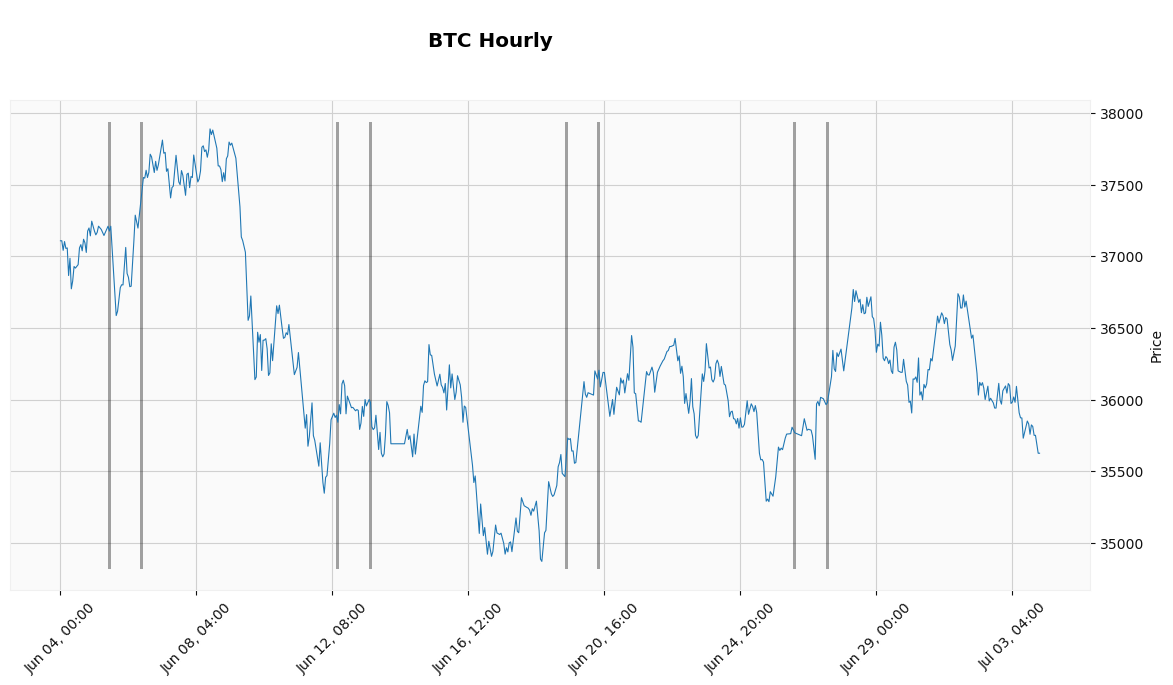

In [1152]:
aggregation = {'open'  :'first',
               'high'  :'max',
               'low'   :'min',
               'close' :'last'}
btch = bitcoin.resample('H').agg(aggregation)
kwargs=dict(type = 'line')
mpf.plot(btch,**kwargs,vlines=dict(vlines=['2021-06-05','2021-06-06','2021-06-12','2021-06-13',
                             '2021-06-19','2021-06-20','2021-06-26','2021-06-27'],
                     linewidths=(1,2,1),colors = 'k',alpha = 0.4),title='\nBTC Hourly', style='yahoo',figsize=(15,7))

#Even with the resampling of the data to prevent system warnings due to too much data, there is still need to specify the type of plot i.e type = 'line' as the hourly data is quite large and plotting with other types e.g. candles will be too tiny to see

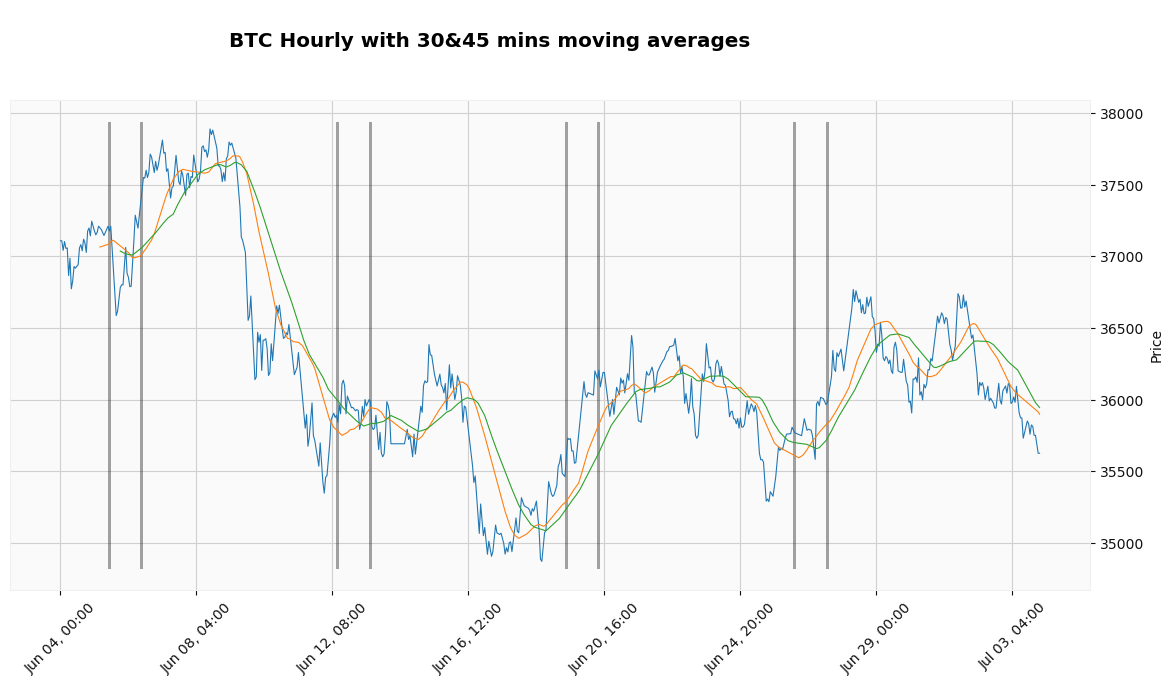

In [1153]:
aggregation = {'open'  :'first',
               'high'  :'max',
               'low'   :'min',
               'close' :'last'}
btch = bitcoin.resample('H').agg(aggregation)
kwargs=dict(type = 'line')
mpf.plot(btch,**kwargs,vlines=dict(vlines=['2021-06-05','2021-06-06','2021-06-12','2021-06-13',
                             '2021-06-19','2021-06-20','2021-06-26','2021-06-27'],
                     linewidths=(1,2,1),colors = 'k',alpha = 0.4),title='\nBTC Hourly with 30&45 mins moving averages', style='yahoo',figsize=(15,7), mav = (30,45))

#Moving averages analyses data points by creating of different subsets of the dataset. In this case, I visualized using a 30 mins and 45 mins moving average as the frequency of this data is in Hours. 30 mins(orange line), 45mins(green line)

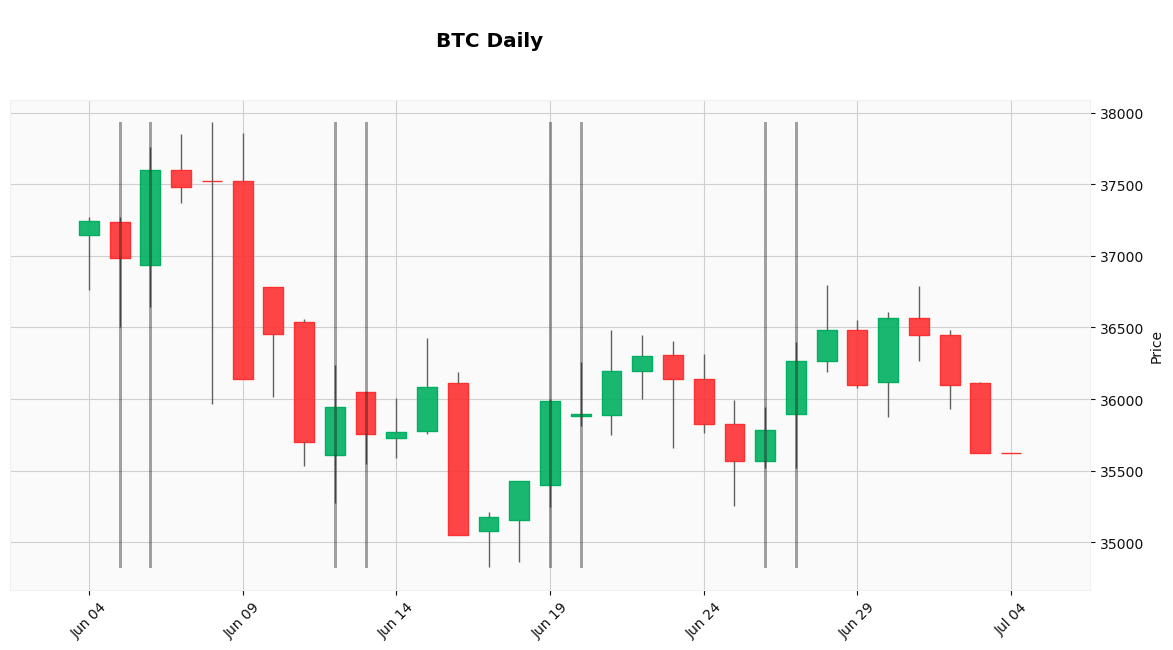

In [1154]:
aggregation = {'open'  :'first',
               'high'  :'max',
               'low'   :'min',
               'close' :'last'}
btcd = bitcoin.resample('D').agg(aggregation)
kwargs=dict()
mpf.plot(btcd,type= 'candle',**kwargs,vlines=dict(vlines=['2021-06-05','2021-06-06','2021-06-12','2021-06-13',
                             '2021-06-19','2021-06-20','2021-06-26','2021-06-27'],
                     linewidths=(1,2,1),colors = 'k',alpha = 0.4),style='yahoo',title='\nBTC Daily',figsize=(15,7))


In [1155]:
#Green candle stick indicates the price rose on that day while red candlestick indicates that the price 
#fell on that day

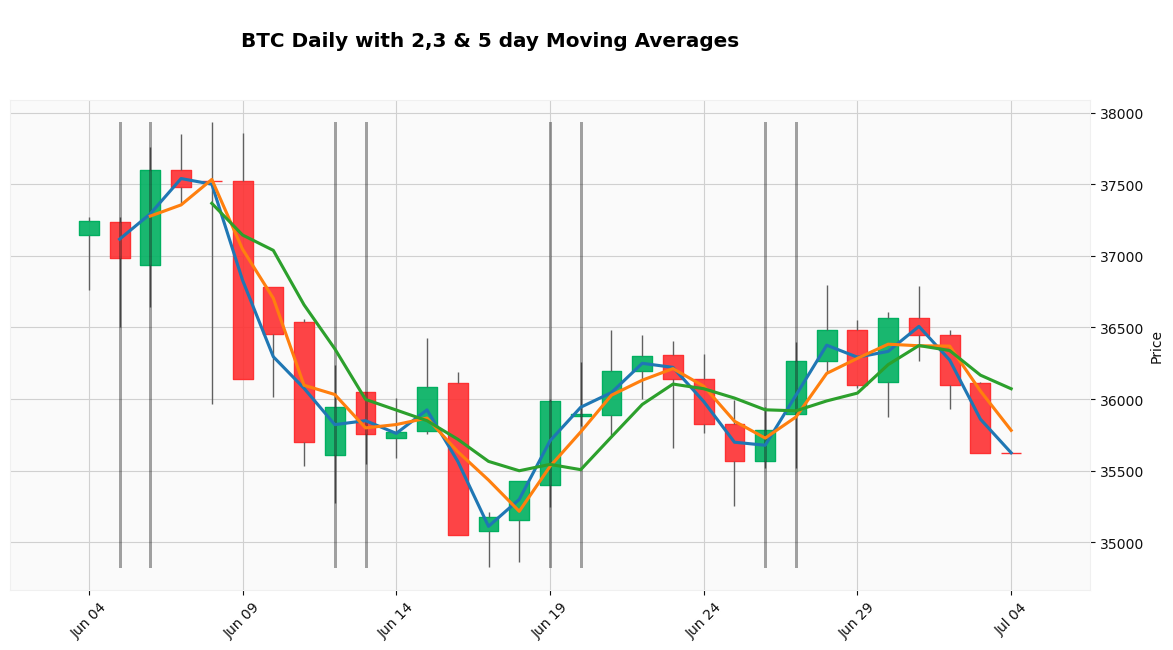

In [1156]:
kwargs=dict()
mpf.plot(btcd,type= 'candle',**kwargs,vlines=dict(vlines=['2021-06-05','2021-06-06','2021-06-12','2021-06-13',
                             '2021-06-19','2021-06-20','2021-06-26','2021-06-27'],
                     linewidths=(1,2,1),colors = 'k',alpha = 0.4),style='yahoo',title='\nBTC Daily with 2,3 & 5 day Moving Averages',figsize=(15,7),mav=(2,3,5))


In [1157]:
# 2 day moving average is blue line 
# 3 day moving average is orange line
# 5 day moving average is green line

In [1158]:
bitcoin.index = pd.date_range("2021-06-09","2021-06-10",periods=len(bitcoin.index))

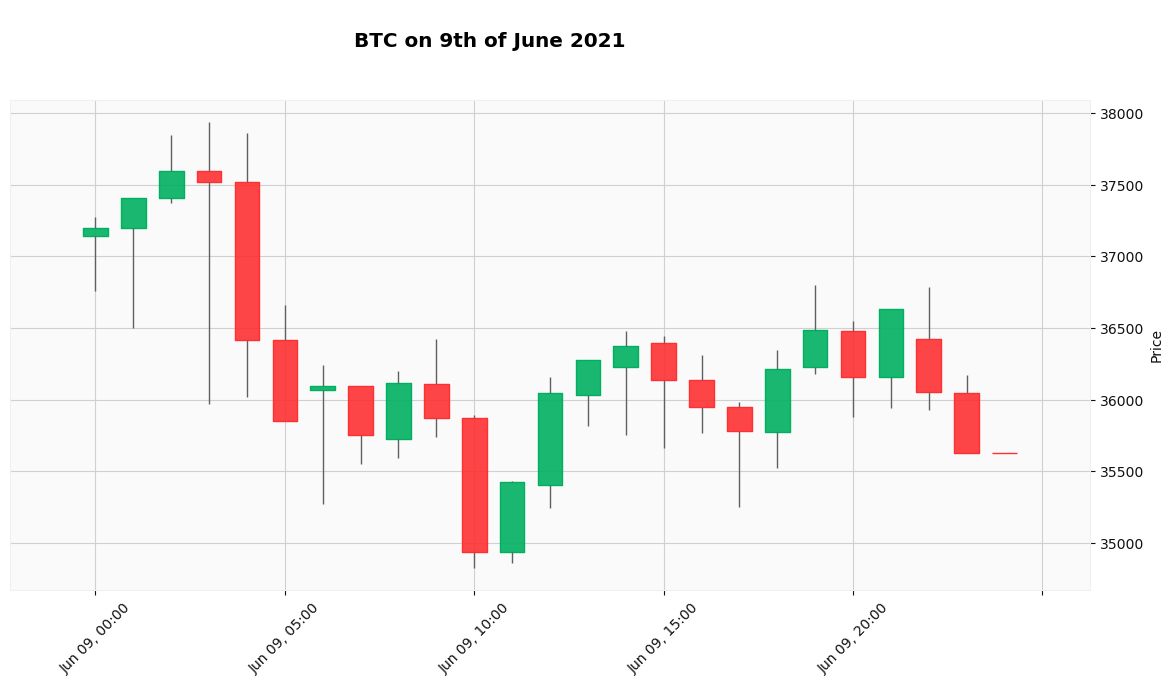

In [1159]:
aggregation = {'open'  :'first',
               'high'  :'max',
               'low'   :'min',
               'close' :'last'}
btch = bitcoin.resample('H').agg(aggregation)
kwargs=dict(type = 'candle')
mpf.plot(btch,**kwargs,title='\nBTC on 9th of June 2021',figsize=(15,7), style='yahoo')

# Questions

# 1 Which day of the week shows the greatest change in price? 

# 2 Which hour of the day shows the greatest change in price?

# 3 Looking at the weekly data, to what extent can the Thursday - Sunday price change be predicted based on the movements from Monday - Wednesday?  

# 4 Looking at weekly data, does the weekday pricing data provide any predictive clues to what will happen by the end of the weekend?

# ANSWERS

# 1 The day that shows the greatest change in price is the 9th of June which is a Wednesday with an opening price of 37500 and a closing price of 36,200.

# 2 The hour that shows the greatest change in price is 04:00am with an opening price of 37,500 and a closing price of 36,400.

# 3 To no extent. The monday to wednesday price movements provides no predicitive clues to what will happen on thursday to sunday. However, thursday and friday pricing data are highly similar.

# 4 Looking at the weekly data, the weekday pricing data provides no predicitive clues whatsoever to what will happen by the weekend.

Prices in dollars($)